# **COMPONENTES PRINCIPALES**

```
Versión   : 1.O, Para uso educativo
Autor     : Luis Beltran Palma Ttito
Lugar     : Cusco, Perú, 2023.
Proposito : PCA y reducción de dimensionalidad
```

### Librería

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Modulo de PCA
from sklearn.decomposition import PCA
from timeit import default_timer as timer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

### **Importación de datos**

Los datos, corresponden a características de imágenes digitalizada de una masa mamaria (en una aguja fina). que describen características de los núcleos celulares presentes en la imagen. El conjunto de datos es linealmente separable utilizando las 30 características de entrada.

**ATRIBUTO DE SALIDA:**

> **diagnosis:** atributo de salida (M = maligno, B = benigno)

**ATRIBUTOS DE ENTRADA**

> Se tiene registrado 10 Características de valor real para cada núcleo celular, el valor medio, error estándar y el "peor" o mayor (media de los tres
valores más grandes) de estas características se calcularon para cada imagen,




> **radius:** media de las distancias del centro a los puntos del perímetro.

> **texture:** desviación estándar de los valores de la escala de grises.

> **perimeter:** perímetro.

> **area:** área.

> **smoothness:** suavidad = severidad de las porciones cóncavas del contorno.

> **compactness:** compacidad = (perímetro ^ 2 / área - 1.0)

> **concavity:** concavidad = severidad de las porciones cóncavas del contorno.

> **concave_points:** puntos cóncavos = número de porciones cóncavas del contorno.

> **symmetry:** simetría.

> **fractal_dimension:** dimensión fractal = "aproximación a la línea de costa" - 1


In [2]:
datos = pd.read_csv("./cancer_seno.csv", sep=',')
datos.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Distribución de datos

In [3]:
# Cáncer Benigno y Maligno
datos.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [4]:
X = datos.drop(['diagnosis'], axis=1)
y = datos['diagnosis']

# **1. Estandarización de datos (requisito para aplicar PCA)**

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ss = StandardScaler()
X_std = ss.fit_transform(X)

X_std


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# **2. Determinación del número óptimo de componentes mediante covarianzas**

Se utiliza la varianza explicada acumulada, y se selecciona el número de componentes mínimo a partir del cual el incremento deja de ser sustancial

In [7]:
# número de atributos de entrada
nums = np.arange(datos.shape[1] - 1)
var_ratio = []

# Determina la varianza explicada para 1, 2, 3, ... 30 componentes
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(X_std)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))


Text(0.5, 1.0, 'Componentes vs Varianza explicada')

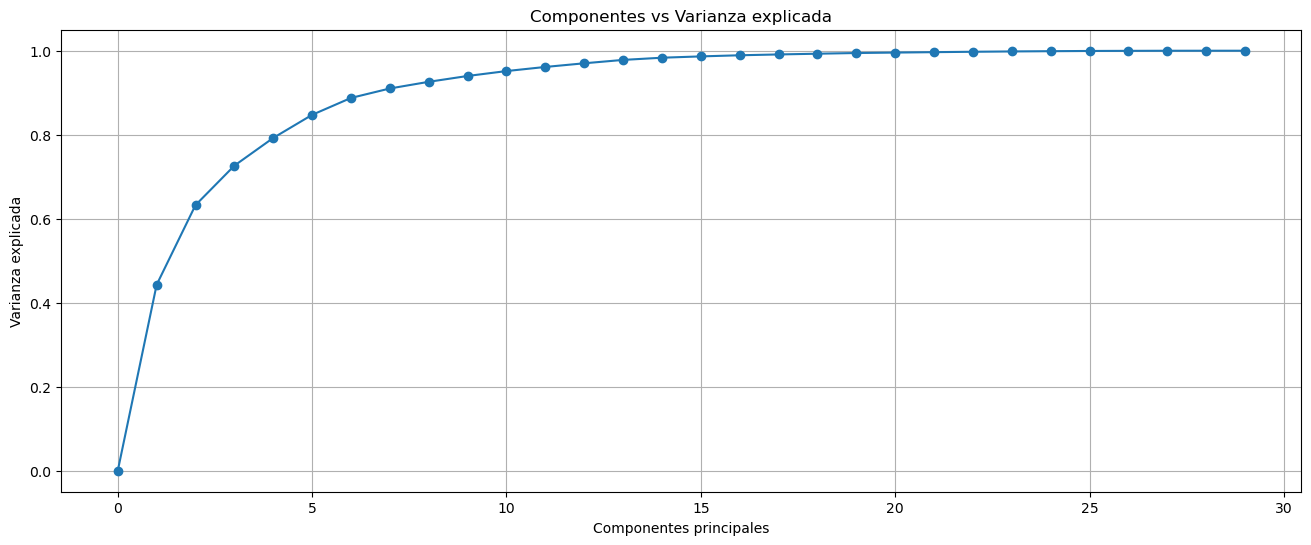

In [8]:
# Gráfico de cantidad de componentes y varianza explicada
plt.figure(figsize=(16, 6))
plt.grid()
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Componentes vs Varianza explicada')

**OBSERVACIONES**

> Para **2 componentes**, se consigue una varianza explicativa de **44%**

> Para **3 componentes**, se consigue una varianza explicativa de **63%**

> Para **4 componentes**, se consigue una varianza explicativa de **72%**

> Y asi sucesivamente

> Para **18 componentes**, se consigue una varianza explicativa de **99.11%**, luego se este punto podemos afirmar que la disminución de la variaza no es sustancial

Motivo por el cual podemos reducir la dimensionalidad de **30** a **18**, previmente aplicando PCA

# **3. Transformación de datos**

Generación del nuevo dataset a partir de 18 componentes principales

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)

# Transformacion de valor originales a valores de componentes principales
X_pca = pca.fit_transform(X_std)
new_datos = pd.DataFrame(X_pca, columns=['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 
                                         'CP7', 'CP8', 'CP9', 'CP10', 'CP11', 'CP12', 
                                         'CP13', 'CP14', 'CP15', 'CP16', 'CP17', 'CP18'])

new_datos['Diagnostico'] = y

new_datos.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12,CP13,CP14,CP15,CP16,CP17,CP18,Diagnostico
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471,-0.549563,M
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212,0.318297,M
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918,-0.087975,M
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634,-0.035875,M
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142,-0.018714,M


In [10]:
new_datos.to_csv('cancer_seno_pca.csv', index=False)

# **4. Aplicación de algoritmo de predicción**

## **4.1. Aplicación de una algoritmo de red neuronal con 30 dimensiones**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=5, test_size=0.3)

In [12]:
%%time
rna = MLPClassifier(hidden_layer_sizes=(500, 400, 200, 100, 50, 10), alpha=0.01, activation='relu')
rna.fit(X_train, y_train)

CPU times: total: 4.34 s
Wall time: 3.17 s


MLPClassifier(alpha=0.01, hidden_layer_sizes=(500, 400, 200, 100, 50, 10))

In [13]:
from sklearn.metrics import confusion_matrix
pred = rna.predict(X_test)
matriz = confusion_matrix(y_test, pred)
print(matriz)
print('Acurracy = ', rna.score(X_test, y_test))

[[110   0]
 [  2  59]]
Acurracy =  0.9883040935672515


## **4.2. Aplicación de una red neuronal con 18 dimensiones**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=5, test_size=0.3)

In [15]:
%%time
rna = MLPClassifier(hidden_layer_sizes=(500, 400, 200, 100, 50, 10), alpha=0.01, activation='relu')
rna.fit(X_train, y_train)

CPU times: total: 3.73 s
Wall time: 3.58 s


MLPClassifier(alpha=0.01, hidden_layer_sizes=(500, 400, 200, 100, 50, 10))

In [16]:
from sklearn.metrics import confusion_matrix
pred = rna.predict(X_test)
matriz = confusion_matrix(y_test, pred)
print(matriz)
print('Acurracy = ', rna.score(X_test, y_test))

[[110   0]
 [  3  58]]
Acurracy =  0.9824561403508771


# **TAREA**

Para el dataset **METABRIC_RNA_mutation.csv**, aplicar PCA:
0. Comprender la característica de los datos, accedea a: https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric
1. Estandarizar los datos
2. Determinar la cantidad óptima de componentes principales.
3. Crear el nuevo dataset en base a cantidad de componentes principales óptimo
4. Realizar la predicción, midiendo el tiempo de ejecución y accuracy.